<a href="https://colab.research.google.com/github/alejandrolq/StaticalLearningI-Tarea2/blob/main/TareaPractica2_Parte1_Modelo_exponencial_covid_19_usando_feature_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning I**

**Sección U**

**Tarea Práctica 2 - Parte 1**

In [237]:
import numpy as np
import pandas as pd
import tensorflow as tf
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.stats import norm

In [238]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [119]:
covid19_data = pd.read_csv('covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [120]:
covid19_data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

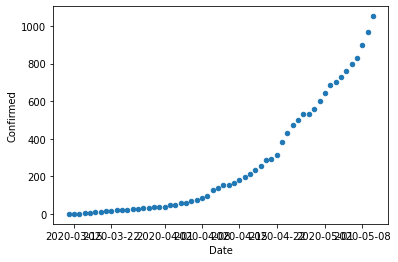

In [121]:
GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

In [122]:
def transform_dataset(df, ln_column, inv):
    if inv:
      df[ln_column] = np.e ** (df["ln("+ln_column+")"])
    else:
      df["ln("+ln_column+")"] = np.log(df[ln_column])
    return df

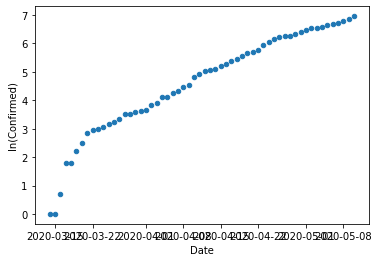

In [123]:
#GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])
GT_confirmed = transform_dataset(GT_confirmed, "Confirmed", inv=False)
GT_confirmed.plot.scatter(x = "Date",y="ln(Confirmed)")

In [124]:
GT_confirmed.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(Confirmed)
13851,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,0.000000
14115,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,0.000000
14379,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,0.693147
14643,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,1.791759
14907,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,1.791759
15171,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,2.197225
15435,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,2.484907
15699,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,2.833213
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732


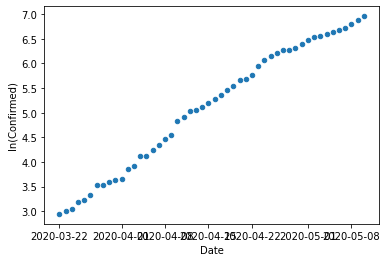

In [125]:
GT_confirmed_post24 = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
GT_confirmed_post24.plot.scatter(x = "Date",y="ln(Confirmed)")

In [126]:
GT_confirmed_post24.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(Confirmed)
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732
16491,NaN,Guatemala,15.7835,-90.2308,2020-03-24,21,1,0,3.044522
16755,NaN,Guatemala,15.7835,-90.2308,2020-03-25,24,1,4,3.178054
17019,NaN,Guatemala,15.7835,-90.2308,2020-03-26,25,1,4,3.218876
17283,NaN,Guatemala,15.7835,-90.2308,2020-03-27,28,1,4,3.332205
17547,NaN,Guatemala,15.7835,-90.2308,2020-03-28,34,1,10,3.526361
17811,NaN,Guatemala,15.7835,-90.2308,2020-03-29,34,1,10,3.526361
18075,NaN,Guatemala,15.7835,-90.2308,2020-03-30,36,1,10,3.583519
18339,NaN,Guatemala,15.7835,-90.2308,2020-03-31,38,1,12,3.637586


In [129]:
GT_confirmed_clean_sorted = GT_confirmed_post24.sort_values(by="Date")
GT_confirmed_clean_sorted.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(Confirmed)
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732
16491,NaN,Guatemala,15.7835,-90.2308,2020-03-24,21,1,0,3.044522
16755,NaN,Guatemala,15.7835,-90.2308,2020-03-25,24,1,4,3.178054
17019,NaN,Guatemala,15.7835,-90.2308,2020-03-26,25,1,4,3.218876


In [130]:
GT_confirmed_clean_sorted = GT_confirmed_clean_sorted.reset_index()
GT_confirmed_clean_sorted['Nday'] = GT_confirmed_clean_sorted.index
GT_confirmed_clean_sorted.head(5)

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(Confirmed),Nday
0,15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439,0
1,16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732,1
2,16491,NaN,Guatemala,15.7835,-90.2308,2020-03-24,21,1,0,3.044522,2
3,16755,NaN,Guatemala,15.7835,-90.2308,2020-03-25,24,1,4,3.178054,3
4,17019,NaN,Guatemala,15.7835,-90.2308,2020-03-26,25,1,4,3.218876,4


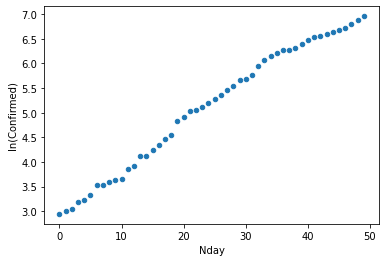

In [131]:
GT_confirmed_clean_sorted.plot.scatter(x = "Nday",y="ln(Confirmed)")

In [132]:
#Realizando una copia del slicing de los datos originales
training = GT_confirmed_clean_sorted[:int((len(GT_confirmed_clean_sorted))*0.8)].copy()
validation = GT_confirmed_clean_sorted[-int((len(GT_confirmed_clean_sorted))*0.2):].copy()
print(len(training))
print(len(validation))
training.head(4)

40
10


,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(Confirmed),Nday
0,15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439,0
1,16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732,1
2,16491,NaN,Guatemala,15.7835,-90.2308,2020-03-24,21,1,0,3.044522,2
3,16755,NaN,Guatemala,15.7835,-90.2308,2020-03-25,24,1,4,3.178054,3


In [174]:
class ModeloLineal:
  def __init__(self):
    self.mb = tf.get_variable("pendiente-intercepto",dtype=tf.float32, shape=[2,1],
                     initializer=tf.zeros_initializer())

  def __call__(self,x, tamaño_muestra_x):
    x_1 = tf.stack([x, np.ones(tamaño_muestra_x)], axis=1, name='x_1_temp')
    return tf.matmul(x_1, self.mb, name="y_hat")

  def actualizar(self,x,y,tamaño_muestra_x,tamaño_muestra_y,learning_rate):
    y_hat = self(x, tamaño_muestra_x)
    x_1 = tf.stack([x, np.ones(tamaño_muestra_x)], axis=1, name='x_1')
    y_1 = y_hat - tf.reshape(y, [tamaño_muestra_y,1])
    gradientes = tf.math.reduce_mean(x_1 * y_1, axis=0, name="gradientes")
    actualizacion_mb = tf.assign(self.mb, self.mb - tf.reshape(gradientes*learning_rate, [2,1]), name="actualizacion_mb")
    return actualizacion_mb

In [186]:
def ejecutar_modelo(learning_rate, batch_size, epochs, x, y):
  tf.compat.v1.reset_default_graph()
  tamaño_muestra_x = len(x)
  tamaño_muestra_y = len(y)
  tf.compat.v1.reset_default_graph()

  tensor_x = tf.placeholder(dtype=tf.float32, shape=[tamaño_muestra_x], name="tensor_x")
  tensor_y = tf.placeholder(dtype=tf.float32, shape=[tamaño_muestra_y], name="tensor_y")

  modelo = ModeloLineal()

  actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,tamaño_muestra_x,tamaño_muestra_y,learning_rate)

  with tf.train.MonitoredSession() as session:
    for epoch in range(epochs):
      feed_dict = {tensor_x:x, tensor_y:y}
      _,mb = session.run([actualizacion_parametros,modelo.mb],feed_dict=feed_dict)        
  return mb

In [218]:
learning_rate = 0.003
batch_size = 10
epochs = 10000

x = training['Nday'].to_numpy()
y = training['ln(Confirmed)'].to_numpy()

mb = ejecutar_modelo(learning_rate, batch_size, epochs, x, y)
print(mb)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[0.09454745]
 [2.8764594 ]]


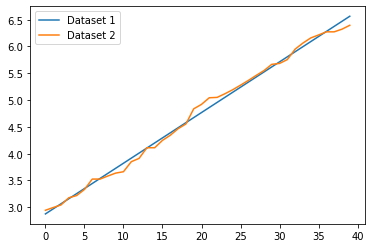

In [219]:
x_vals = np.arange(0,40)
y_vals = mb[1,0] + mb[0,0] * x_vals

plt.plot(x_vals, y_vals)
plt.plot(x,y)

plt.legend(["Dataset 1", "Dataset 2"])

In [262]:
x_test = validation['Nday'].to_numpy()
y_test = validation['ln(Confirmed)'].to_numpy()

def prediccion(mb, x, dataframe):
  x_1 = np.column_stack((x,np.ones(len(x))))
  pred_modelo_manual = np.dot(x_1, mb)
  pred_modelo_manual = np.reshape(pred_modelo_manual, (1, len(pred_modelo_manual)))[0]
  if dataframe:
    data = {'ln(Confirmed)':  pred_modelo_manual}
    df = pd.DataFrame (data, columns = ['ln(Confirmed)'])
    return df
  else:
    return pred_modelo_manual

def rmse(y, y_hat):
  return np.mean(np.power(y-y_hat, 2))*0.5 

y_validation = prediccion(mb, x_test, dataframe=False)
y_validation_1 = prediccion(mb, x_test, dataframe=True)
print(rmse(y_validation, y_test))

0.08839994157655169


In [265]:
def calcular_casos(fecha, mb):
  fecha_inicial = datetime.strptime('22-03-2020', '%d-%m-%Y')
  fecha_calculo = datetime.strptime(fecha, '%d-%m-%Y')
  dias = [(fecha_calculo - fecha_inicial).days]
  return transform_dataset(prediccion(mb, dias, dataframe=True), 'Confirmed', inv=True)[['Confirmed']]

calcular_casos('30-05-2020', mb)


,Confirmed
0,12091.203063
